시계열을 위한 라이브러리 설치
- pip install yfinance : 야후 파이낸스 데이터를 가져오기 위한 라이브러리
- pip install prophe : 예측 모델링 및 시각화를 우히나 라이브러리

In [9]:
pip install yfinance

  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [11]:
pip install prophet

  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732018 sha256=8b91a737895a9c59ca79512b4d8cc790dc9e564365447a12a69b25ffad396375
  Stored in directory: c:\users\win10_original\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus



In [1]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta

In [13]:
join_raw = pd.read_csv('C:/Users/win10_original/Desktop/자동화프로세스/payments_raw/payments_join_data_raw.csv')
join_raw['register_month'] = pd.to_datetime(join_raw['register_month'], format='%Y-%m-%d')
join_raw['register_day'] = pd.to_datetime(join_raw['register_day'], format='%Y-%m-%d')
join_raw.columns

Index(['register_month', 'register_day', 'day_num', 'mall_total', 'mall_real',
       'card_pg_cnt', 'card_pg_real', 'payments_cnt', 'payments_real',
       'personbiz_cnt', 'personbiz_real'],
      dtype='object')

In [17]:
from prophet import Prophet #prophet 라이브러리 불러오기

df_train = join_raw[['register_day', 'mall_total']]
df_train = df_train.rename(columns={'register_day': 'ds', 'mall_total':'y'})
m = Prophet()
m.fit(df_train)

13:52:16 - cmdstanpy - INFO - Chain [1] start processing
13:52:16 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=35)
forecast = m.predict(future)

In [31]:
forecast.to_csv('../forecast.csv')

<b> 휴일 지정하기
- holiday 모듈을 활용해서 지정하기

In [46]:
df_train = join_raw[['register_day', 'mall_total']]
df_train.head()

,register_day,mall_total
0,2022-01-01,115
1,2022-01-02,143
2,2022-01-03,353
3,2022-01-04,415
4,2022-01-05,374


In [52]:
last_days = pd.date_range('20100101','20211101', freq='M') #월별 말일 = M
last_days

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31'],
              dtype='datetime64[ns]', length=142, freq='M')

<b> 작업과정에서 발생했던 오류
- AttributeError: 'Series' object has no attribute 'weekday'
- DataFrame column is a Series, and for Series you need dt.accessor to calculate days (if you are using a newer Pandas version). You can see docs here

In [80]:
df_train['weekday'] = df_train['register_day'].dt.weekday
df_train.head()

C:\Users\win10_original\AppData\Local\Temp\ipykernel_14128\4013115932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['weekday'] = df_train['register_day'].dt.weekday


,register_day,mall_total,weekday
0,2022-01-01,115,5
1,2022-01-02,143,6
2,2022-01-03,353,0
3,2022-01-04,415,1
4,2022-01-05,374,2


In [90]:
df_train['register_day']

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
         ...    
386   2023-01-22
387   2023-01-23
388   2023-01-24
389   2023-01-25
390   2023-01-26
Name: register_day, Length: 391, dtype: datetime64[ns]

In [95]:
kor_holidays

AttributeError: 'list' object has no attribute 'shape'

In [89]:
df_train['register_day'] in kor_holidays

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [88]:


if df_train['register_day'] in kor_holidays:
    print('공휴일')
else :
    print('공휴일 아님')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [87]:
df_train['holiday'] = np.where((df_train['weekday'] == 5) | (df_train['weekday'] == 6), 1, 0)


df_train

C:\Users\win10_original\AppData\Local\Temp\ipykernel_14128\797572758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['holiday'] = np.where((df_train['weekday'] == 5) | (df_train['weekday'] == 6), 1, 0)


,register_day,mall_total,weekday,holiday
0,2022-01-01,115,5,1
1,2022-01-02,143,6,1
2,2022-01-03,353,0,0
3,2022-01-04,415,1,0
4,2022-01-05,374,2,0
...,...,...,...,...
386,2023-01-22,91,6,1
387,2023-01-23,116,0,0
388,2023-01-24,147,1,0
389,2023-01-25,373,2,0


In [73]:
register_day

In [77]:


target_days = []
for register_date in last_days:
    while (register_date in kor_holidays):
        diff_days = datetime.timedelta(days=1)
        register_date = register_date - diff_days
    target_days.append(register_date)

target_days

C:\Users\win10_original\AppData\Local\Temp\ipykernel_14128\1784389009.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  while (register_date in kor_holidays):


[Timestamp('2010-01-31 00:00:00', freq='M'),
 Timestamp('2010-02-28 00:00:00', freq='M'),
 Timestamp('2010-03-31 00:00:00', freq='M'),
 Timestamp('2010-04-30 00:00:00', freq='M'),
 Timestamp('2010-05-31 00:00:00', freq='M'),
 Timestamp('2010-06-30 00:00:00', freq='M'),
 Timestamp('2010-07-31 00:00:00', freq='M'),
 Timestamp('2010-08-31 00:00:00', freq='M'),
 Timestamp('2010-09-30 00:00:00', freq='M'),
 Timestamp('2010-10-31 00:00:00', freq='M'),
 Timestamp('2010-11-30 00:00:00', freq='M'),
 Timestamp('2010-12-31 00:00:00', freq='M'),
 Timestamp('2011-01-31 00:00:00', freq='M'),
 Timestamp('2011-02-28 00:00:00', freq='M'),
 Timestamp('2011-03-31 00:00:00', freq='M'),
 Timestamp('2011-04-30 00:00:00', freq='M'),
 Timestamp('2011-05-31 00:00:00', freq='M'),
 Timestamp('2011-06-30 00:00:00', freq='M'),
 Timestamp('2011-07-31 00:00:00', freq='M'),
 Timestamp('2011-08-31 00:00:00', freq='M'),
 Timestamp('2011-09-30 00:00:00', freq='M'),
 Timestamp('2011-10-31 00:00:00', freq='M'),
 Timestamp

In [43]:
pip install holiday

Note: you may need to restart the kernel to use updated packages.


In [41]:
import holidays

In [45]:
kor_holidays = list(holidays.KOR(years=range(2022, 2024)).keys())
kor_holidays

[datetime.date(2022, 1, 1),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 1),
 datetime.date(2022, 2, 2),
 datetime.date(2022, 3, 1),
 datetime.date(2022, 5, 8),
 datetime.date(2022, 5, 5),
 datetime.date(2022, 5, 1),
 datetime.date(2022, 6, 6),
 datetime.date(2022, 8, 15),
 datetime.date(2022, 9, 9),
 datetime.date(2022, 9, 10),
 datetime.date(2022, 9, 11),
 datetime.date(2022, 9, 12),
 datetime.date(2022, 10, 3),
 datetime.date(2022, 10, 9),
 datetime.date(2022, 10, 10),
 datetime.date(2022, 12, 25),
 datetime.date(2023, 1, 1),
 datetime.date(2023, 1, 21),
 datetime.date(2023, 1, 22),
 datetime.date(2023, 1, 23),
 datetime.date(2023, 1, 24),
 datetime.date(2023, 3, 1),
 datetime.date(2023, 5, 27),
 datetime.date(2023, 5, 5),
 datetime.date(2023, 5, 1),
 datetime.date(2023, 6, 6),
 datetime.date(2023, 8, 15),
 datetime.date(2023, 9, 28),
 datetime.date(2023, 9, 29),
 datetime.date(2023, 9, 30),
 datetime.date(2023, 10, 3),
 datetime.date(2023, 10, 9),
 datetime.date(2023, 12, 2

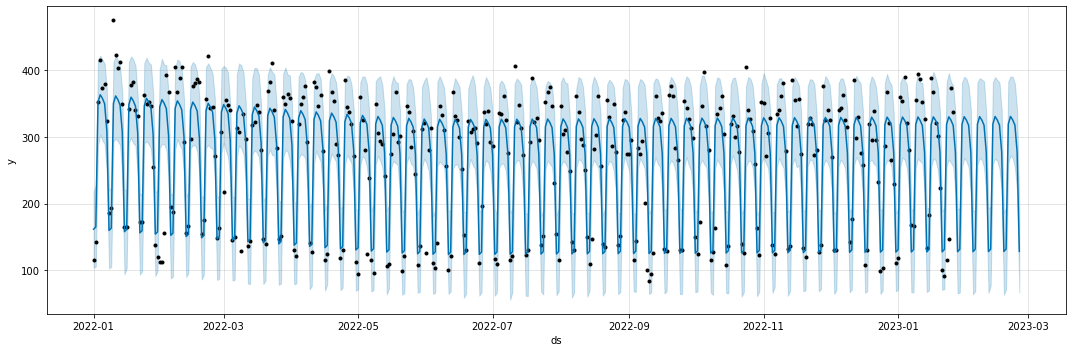

In [25]:
fig1 = m.plot(forecast, figsize=(15, 5))

14:19:38 - cmdstanpy - INFO - Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing


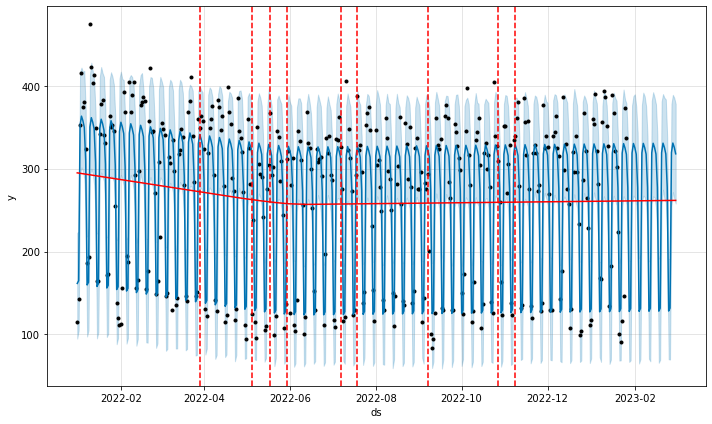

In [39]:
m = Prophet(changepoint_prior_scale=0.5)
m.fit(df_train)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing


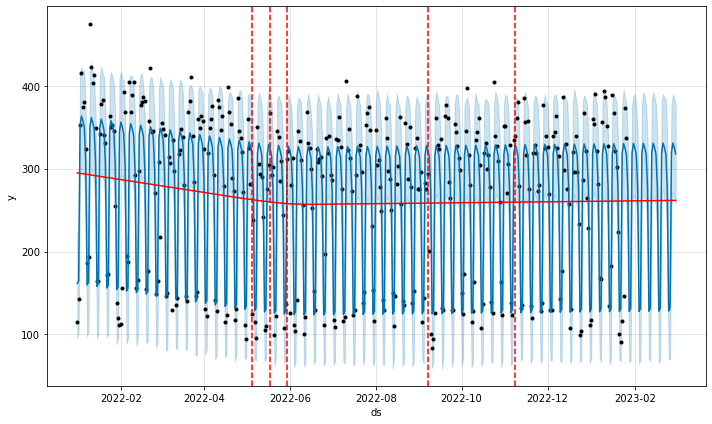

In [38]:
from prophet.plot import add_changepoints_to_plot


m = Prophet(changepoint_prior_scale=0.3)
m.fit(df_train)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

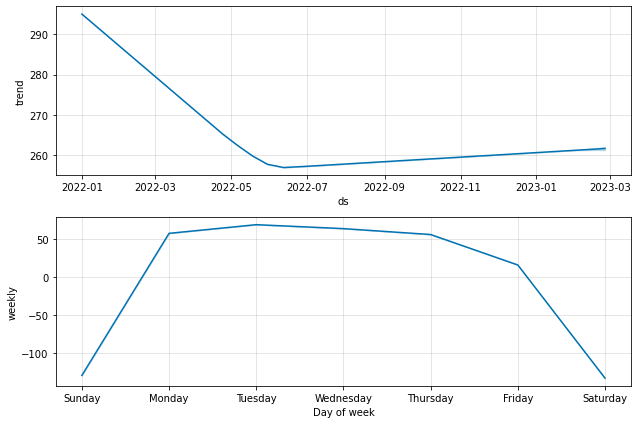

In [24]:
fig2 = m.plot_components(forecast)